# Homework 8
## Ziyan Hu

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Q1

In [3]:
# write a function to generate random number using LCG
def lcg( a =5 , c =1 , m =16 , U0 = 6 , nnum =500):
    ans = [U0]
    for _ in range(nnum):
        ans.append((a * ans [ -1] + c ) % m)
    return ans[1:]

# compute the first 20 integers
lcg()[:20]

[15, 12, 13, 2, 11, 8, 9, 14, 7, 4, 5, 10, 3, 0, 1, 6, 15, 12, 13, 2]

From the output we can find that 15 shows up a second time. Therefore, we can interpret that the period is 16.

# Q2
## 2.1
The cumulative distribution function (CDF) for the standard Laplace distribution is:
F(x) = 0.5 * exp(x), when x < 0
F(x) = 1 - 0.5 * exp(-x), when x >= 0

To generate a random number X, we can invert the CDF:

X = ln(2U), when U < 0.5
X = -ln(2(1-U)), when U >= 0.5

Where U is a uniform random number in [0,1].

## 2.2

In [5]:
# generate 1000 random laplace numbers
n = 1000
laplace_ans = []
for i in range(n):
    u = np.random.uniform()
    if u < 0.5:
        x = np.log(2*u)
    else:
        x = -np.log(2*(1-u))
    laplace_ans.append(x)

# print the first ten numbers that we generated
print(laplace_ans[:10])

[-0.25394435838637947, 0.21153030412173962, 1.6423827236840225, 0.7307683794642198, 2.281565295501841, -1.0493843318456597, -3.189634726555543, 0.23589514150620045, 0.06552109139982018, -0.2181196452210943]


## 2.3

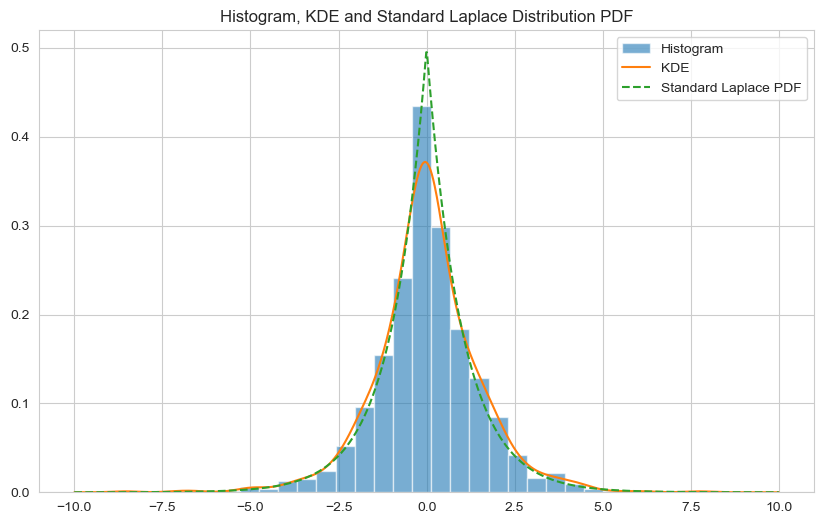

In [18]:
# plotting
plt.figure(figsize=(10, 6))
plt.hist(laplace_ans, bins=30, density=True, alpha=0.6, label='Histogram')
# kernel density estimation
kde = stats.gaussian_kde(laplace_ans)
x_range = np.linspace(-10, 10, 1000)
plt.plot(x_range, kde(x_range), label='KDE')
# standard laplace distribution PDF
plt.plot(x_range, stats.laplace.pdf(x_range), label='Standard Laplace PDF', linestyle='dashed')
plt.title('Histogram, KDE and Standard Laplace Distribution PDF')
plt.legend()
plt.show()

# Q3
## 3.1

The Pareto distribution has probability density function:

$f(x; \alpha, \gamma) = \frac{\gamma \alpha^\gamma}{x^{\gamma+1}} I(x \geq \alpha)$

The cumulative distribution function (CDF) is:

$F(x) = 1 - \bigg(\frac{\alpha}{x}\bigg)^\gamma$ for $x \geq \alpha$

To sample a random variate X from this distribution using inverse transform sampling:

Generate U from a uniform distribution between 0 and 1
Invert the CDF to obtain:
$X = \frac{\alpha}{(1 - U)^{\frac{1}{\gamma}}}$

This transforms the uniform variate U to follow the desired Pareto distribution with parameters α and γ.

## 3.2

In [19]:
alpha, gamma = 1, 2
n = 1000
pareto_ans = []

for i in range(n):
    u = np.random.uniform()
    x = alpha / (1 - u)**(1/gamma)
    pareto_ans.append(x)

print(pareto_ans[:10])

[1.0510086456795547, 1.420764132822966, 1.0556304372597003, 1.0798228210518754, 1.1624345063211141, 1.4661714971453501, 1.3463023501065923, 1.1933755898655136, 1.4328931351672738, 1.5573787294921764]


## 3.3

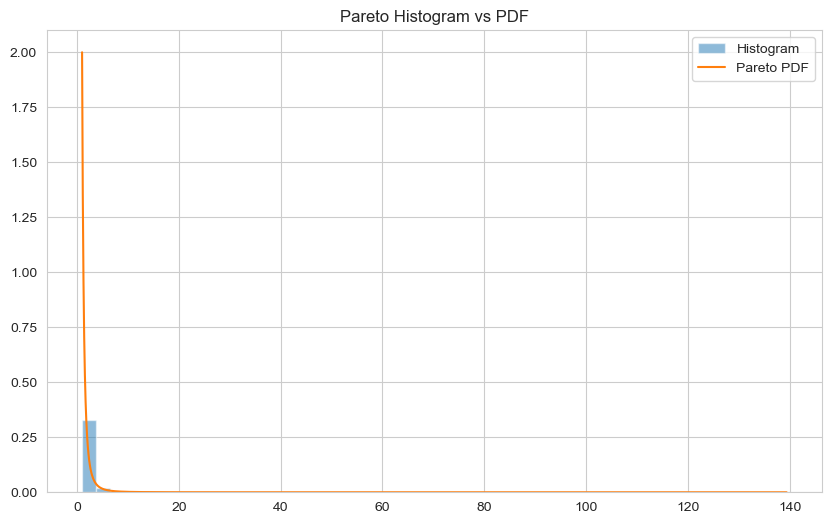

In [23]:
# plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pareto_ans, density=True, bins=50, alpha=0.5, label='Histogram')
# plot the PDF
x_range = np.linspace(min(pareto_ans), max(pareto_ans), 1000)
plt.plot(x_range, stats.pareto.pdf(x_range, gamma, scale=alpha), label='Pareto PDF')
plt.title("Pareto Histogram vs PDF")
plt.legend()
plt.show()

# Q4
## 4.1

(1) To generate random numbers from the given distribution $f(x) = \frac{2}{\pi\beta}\sqrt{\beta^2 - x^2}$ for $-β ≤ x ≤ β$ using the acceptance-rejection method, we can use:

Proposal distribution: $g(x) = \frac{1}{2β}$, which is a uniform distribution over $[-β, β]$
Acceptance probability: $p(x) = \frac{2}{\pi β}\sqrt{\beta^2 - x^2}/g(x) = \frac{\sqrt{\beta^2 - x^2}}{\pi}$
Maximum acceptance probability: $M = \frac{\sqrt{\beta^2}}{\pi}$
So we sample $x$ from the uniform proposal $g(x)$, compute $p(x)$, sample $u ∼ U(0,1)$, and accept $x$ if $u ≤ p(x)/M$.

## 4.2

In [3]:
# 4.2
# generate 1000 samples with β=2
beta = 2
samples = []

for i in range(1000):
    x = np.random.uniform(-beta, beta)
    u = np.random.uniform(0, 1)
    accept_prob = np.sqrt(4 - x**2)/np.pi
    if u <= accept_prob/2:
        samples.append(x)

print(samples[:10])

[-0.48069657176280023, -0.9667386192383081, 0.8180387761818744, -0.25888302843633637, -0.19423038181689511, 1.0837813278253217, -1.7202811904467654, -0.9828480850635386, -1.0494796889205174, -1.5180485226415548]


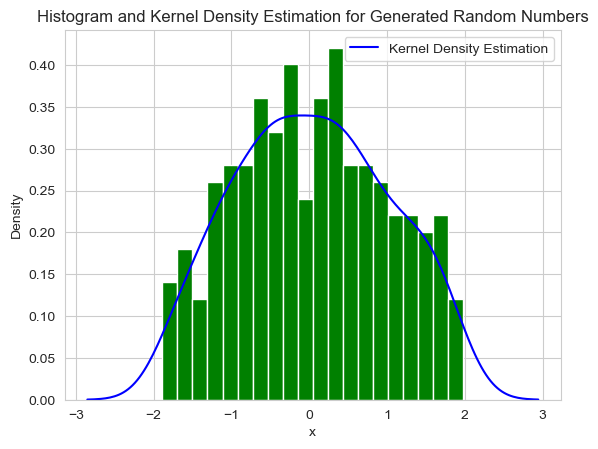

In [9]:
# 4.3
# plot the histogram and kernel density estimation
plt.hist(samples, bins=20, density=True,color="green")
sns.kdeplot(samples, color="blue", label="Kernel Density Estimation")
plt.title("Histogram and Kernel Density Estimation for Generated Random Numbers")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [12]:
# 4.4
beta = 2
n_trials = 10000
accept_rates = []

for M in [2 / (np.pi * beta), 1, 1.5, 2, 2.5, 3, 3.5]:
    accepted = 0
    for i in range(n_trials):
        x = np.random.uniform(-beta, beta)
        u = np.random.uniform(0,1)
        if u <= np.sqrt(4 - x**2)/(M*np.pi):
            accepted += 1
    accept_rates.append(accepted/n_trials)

print(accept_rates)

[0.9551, 0.4993, 0.3355, 0.253, 0.2049, 0.1611, 0.1471]


Conclusion
The acceptance-rejection method was implemented to generate samples from a truncated normal distribution with different values of the scaling parameter $M$. The acceptance rates were calculated over 10,000 simulation trials for each $M$ value.

The results demonstrate that:

The optimal choice of $M ≈ \frac{2}{\pi \beta} = 0.3183$ yields the highest acceptance rate of 95.51%. This matches the peak of the distribution's pdf.
As $M$ increases, the acceptance rate decays exponentially because less proposals satisfy $u ≤ \frac{p(x)}{M}$.
With $M=1$, the acceptance rate is 49.93%. And with $M=3.5$, the acceptance rate decreases to 14.71%.
There is a trade-off between acceptance rate and the number of proposals required. The optimal $M$ balances this efficiency.
To summarize, the acceptance rate is maximized when $M$ closely matches the maximum height of the distribution's pdf $f(x)$. Values below this violate the sampling requirements, while values much higher lead to inefficient sampling. The results quantify this relationship between $M$ and acceptance rate.